<a href="https://colab.research.google.com/github/yash2005-cpu/KSS-Machine-Learning-2025/blob/main/DataScience_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science - Basics

- The science of extracting useful information from raw data, by applying techniques of statistics, machine learning, scientific computing and visualization, algorithms, processing and systems.
- "Data Scientist: The Sexiest Job of the 21st Century"
- Ever-growing demand for data scientists across all industries...social media to agriculture, semiconductors to cosmology and more!

**Learning Goals:**
- Understand the basics of Data Science
- Learn the basics of Data Science using hands-on exercises involving Python + Numpy, Pandas, Matplotlib, etc.


**Additional reading:**
- Wikipedia: https://en.wikipedia.org/wiki/Data_science
- Open-access textbook: https://openstax.org/details/books/principles-data-science
- Data Science Glossary: https://www.knime.com/blog/data-science-glossary

Basics:
* Data:
  * Quantitative (Numerical)
    * Discrete
    * Continuous
  * Qualitative (Categorical)
    * Nominal
    * Ordinal
* Dataset:
* Information:

### **Data Science Lifecycle:**
Image Courtesy: https://ischoolonline.berkeley.edu/data-science/what-is-data-science/

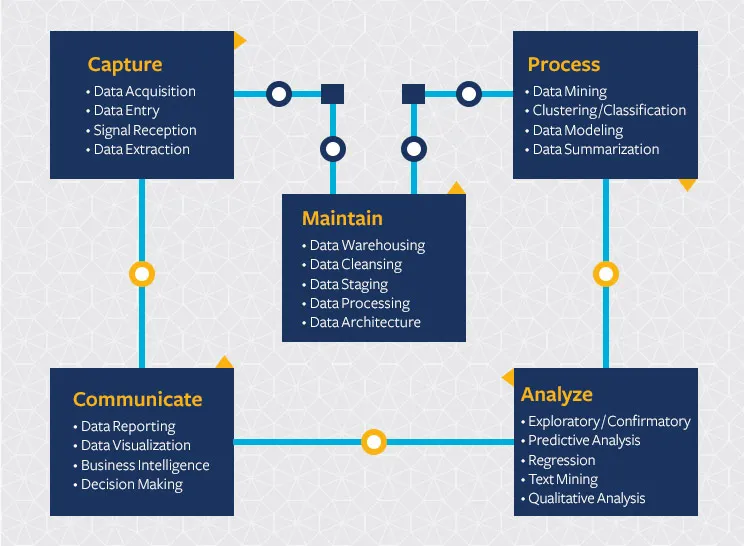

### Exploratory Data Analysis





In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing as chdata
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset
try:
  cal_housing = pd.read_csv('/content/sample_data/california_housing_train.csv')
except FileNotFoundError:
  print("Error: 'california_housing_train.csv' not found in the sample_data folder.")
  # Handle the error appropriately, e.g., exit or use a different dataset
  exit()

In [3]:
cal_housing.head(10)    # pass number of samples to be shown as a parameter

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [4]:
column_list = cal_housing.columns.tolist()
print(f"\nColumns in Dataset: {column_list}")

num_rows = cal_housing.shape[0]
print(f"\nSamples in Dataset: {num_rows}")


Columns in Dataset: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

Samples in Dataset: 17000


In [5]:
print("\nData Info:")
print(cal_housing.info())

print("\nData Description:")
print(cal_housing.describe())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None

Data Description:
          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947

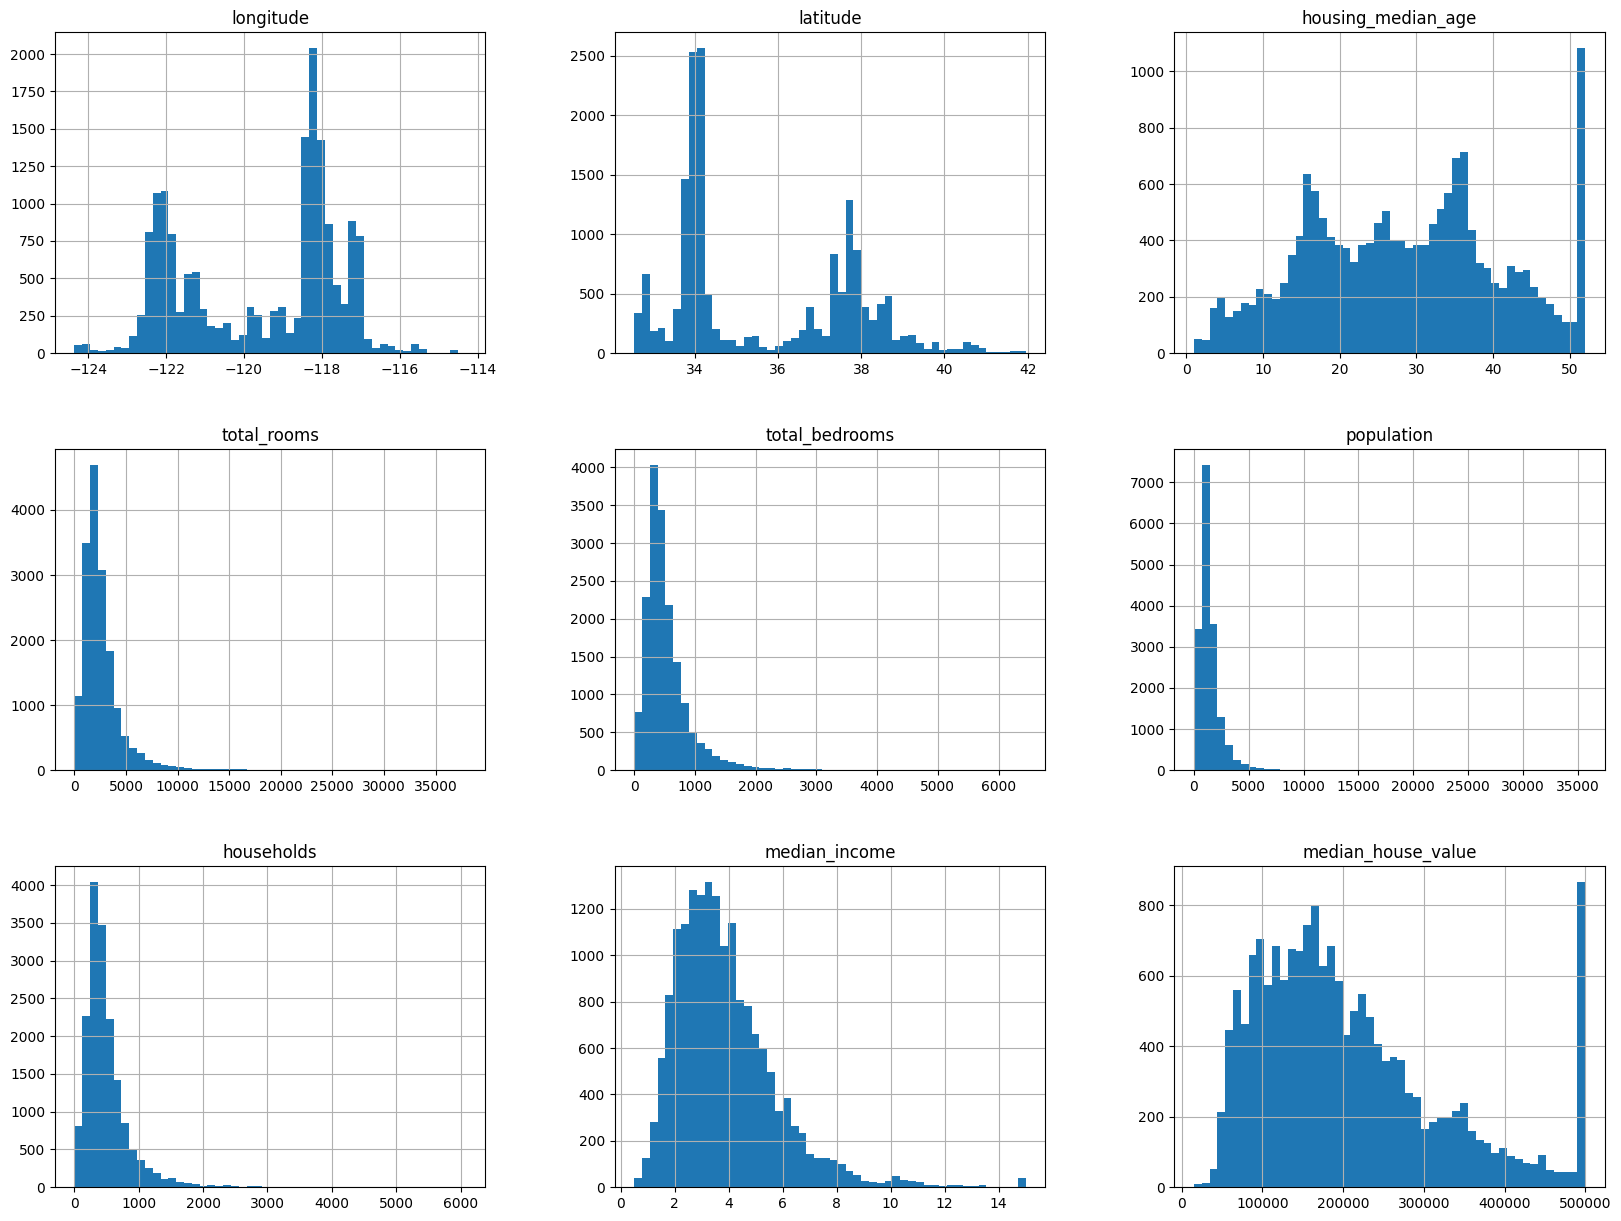

In [6]:
# Univariate analysis: Understand the distribution of data for each column (attribute)
cal_housing.hist(bins=50, figsize=(20,15))
plt.show()

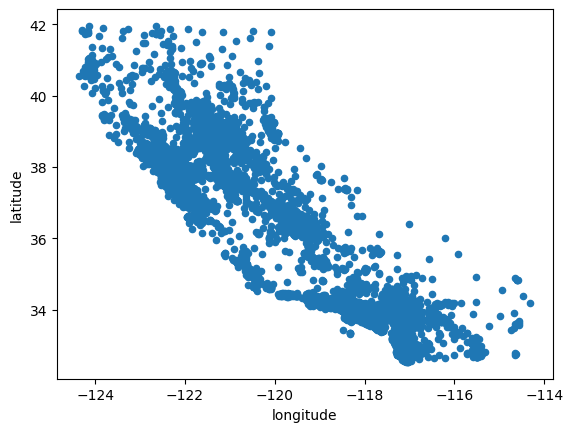

In [15]:
# Visualize the data based on location
def draw_map(df):
  df.plot(kind="scatter", x="longitude", y="latitude")

draw_map(cal_housing)

<Axes: xlabel='longitude', ylabel='latitude'>

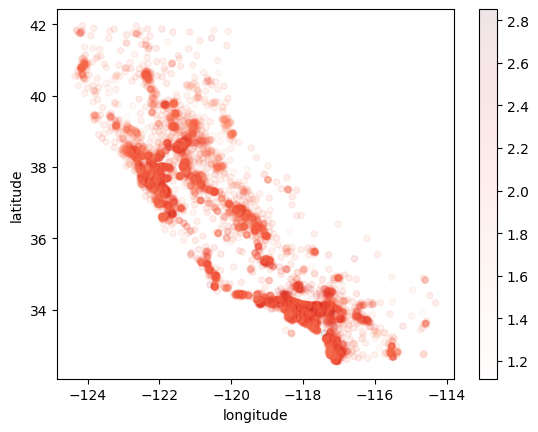

In [8]:
# Visualize the data based on location and population density
# Univariate analysis: Visualize 'population trends'

cal_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
                 c=cal_housing["population"]**0.1, cmap=plt.get_cmap("Reds"))

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.get_cmap.html
# https://matplotlib.org/stable/users/explain/colors/colormaps.html

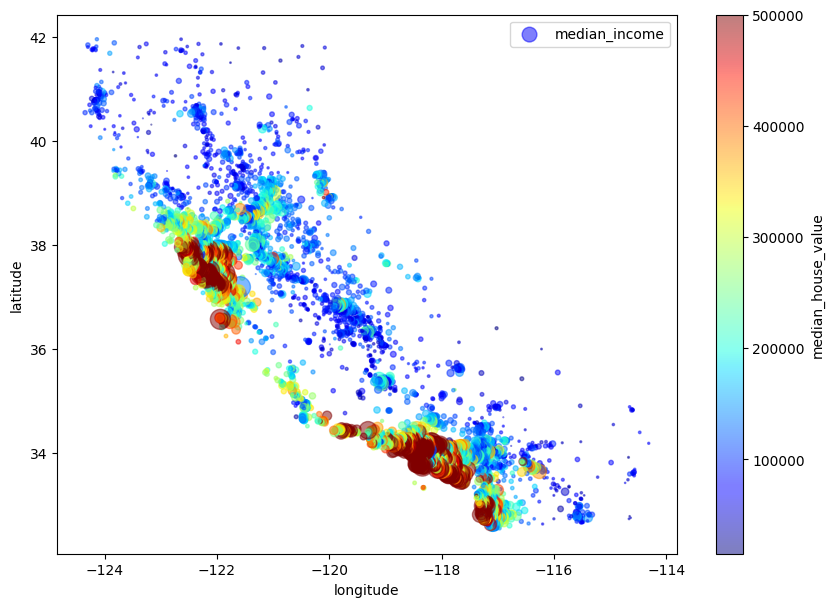

In [9]:
# Visualize the data based on location
# Bivariate analysis: Visualize 'median_house_value' vs 'median income'

cal_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
                 s=cal_housing["median_income"]**2, label="median_income", figsize=(10,7),
                 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()


Bivariate Analysis: Correlation Matrix

Heatmap:


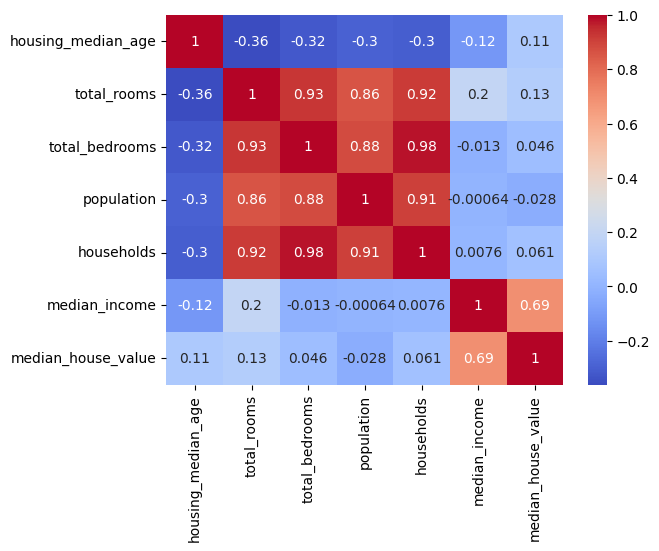

In [26]:
# Bivariate Analysis: Examine relationships between pairs of variables:
# Scatter plots: `plt.scatter(df['column_1'], df['column_2'])` to visualize relationships
# Correlation matrix: `df.corr()` to quantify linear relationships
# Heatmap: `sns.heatmap(df.corr())` to visualize the correlation matrix

def cal_corralation(df):
  print("\nBivariate Analysis: Correlation Matrix")
  cal_housing_qnt = df.drop(columns=['longitude','latitude'])
  correlation_matrix = cal_housing_qnt.corr()
  print("\nHeatmap:")
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
  plt.show()

cal_corralation(cal_housing)

Context for next question:


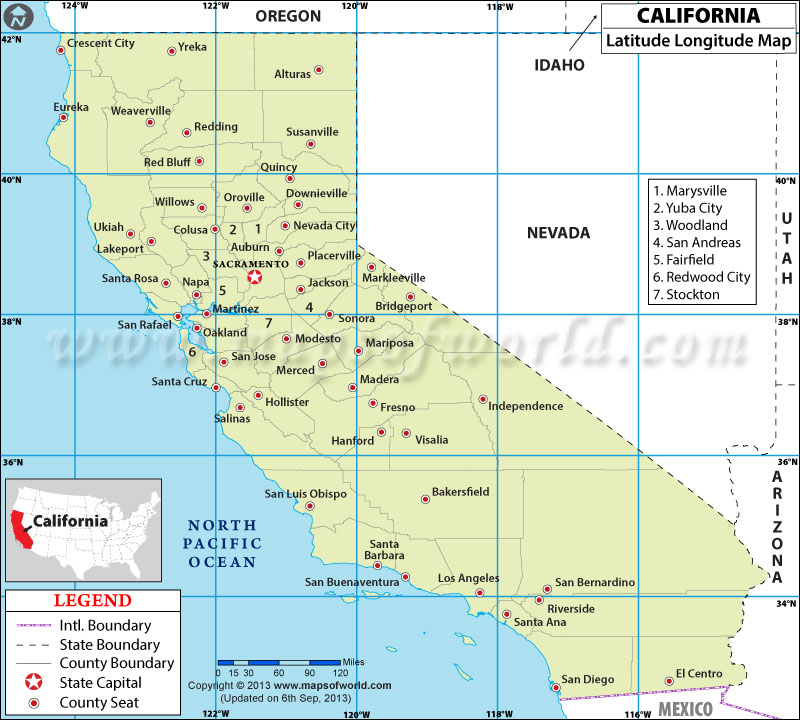

Norcal + Socal = Total ---> 7264 + 9736 = 17000



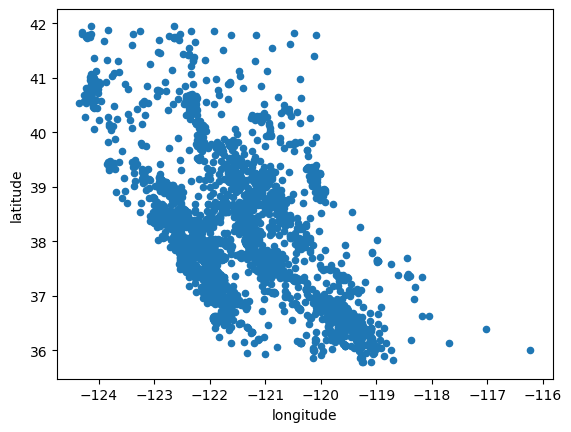

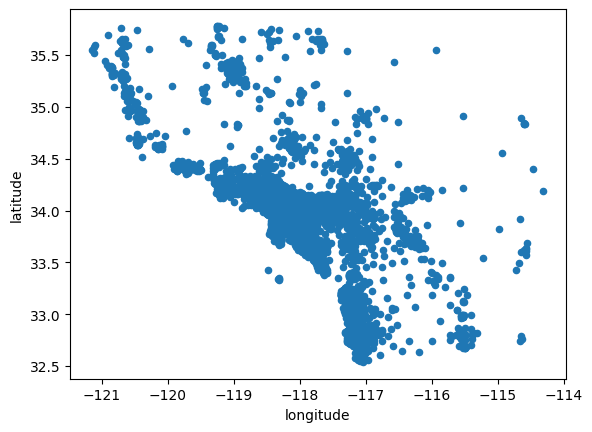

In [24]:
# Classroom exercise #1
# Do the above analysis remain same for Northern vs Southern California?
# Hint: Assume 35.79'N latitude as a split for North vs South
# Write code here...

#Create the mask
mask = cal_housing['latitude'] >= 35.79

norcal_housing = cal_housing[mask]
socal_housing = cal_housing[~mask]

draw_map(norcal_housing)

draw_map(socal_housing)

count_norcal = norcal_housing.shape[0]

count_socal = socal_housing.shape[0]

total_count = count_norcal + count_socal

print(f"Norcal + Socal = Total ---> {count_norcal} + {count_socal} = {total_count}\n")


Bivariate Analysis: Correlation Matrix

Heatmap:


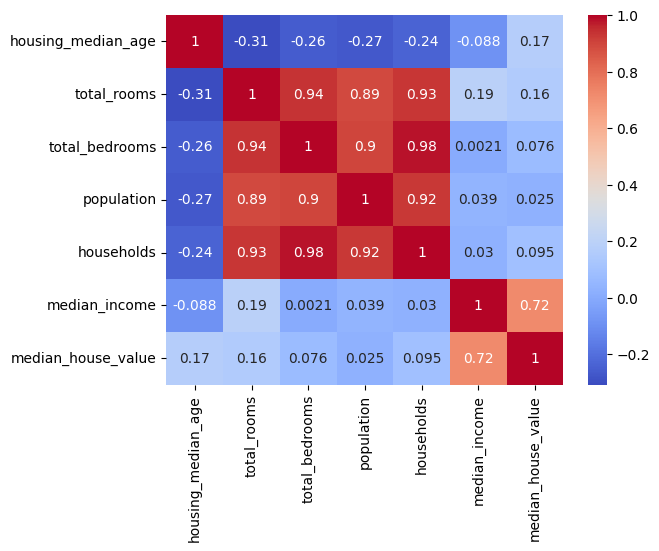


Bivariate Analysis: Correlation Matrix

Heatmap:


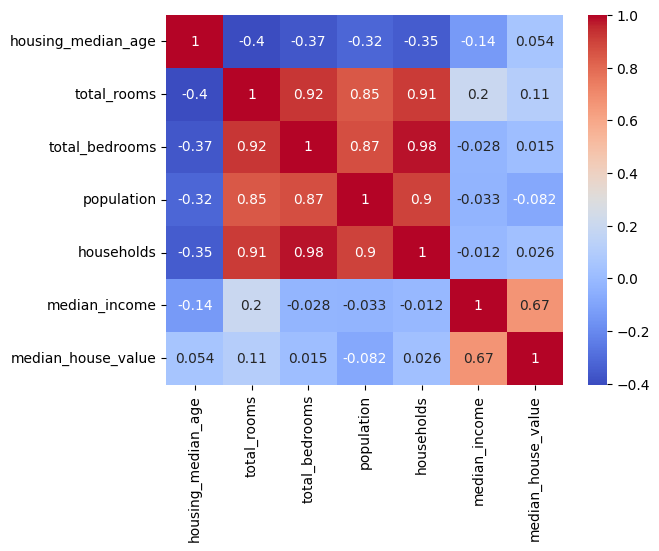

In [28]:
# Classroom exercise #2
# Analyze the correlation between median_income and median_house_value further
# Write code here...

cal_corralation(norcal_housing)
cal_corralation(socal_housing)

In [41]:
# Classroom exercise #3
# (Part 1) How many top 5%ters (use median_income) live in homes worth <$180k (use median_home_value)?
# (Part 1) How many top 5%ters live in northern vs southern california?
# (Part 2) How many bottom 5%ters (use median_income) live in homes worth >$500k (use median_home_value)?
# (Part 2)How many bottom 5%ters live in northern vs southern california?
# Write code here...

#Part 1
percentile_95 = cal_housing['median_income'].quantile(0.95)

def part1(df):
  mask_income = df['median_income'] >= percentile_95
  mask_homevalue = df['median_house_value'] < 180000

  income_masked_cal_housing = df[mask_income]
  housevalue_masked_cal_housing = income_masked_cal_housing[mask_homevalue]

  print(housevalue_masked_cal_housing.shape[0])

part1(cal_housing)
part1(norcal_housing)
part1(socal_housing)

#Part 2
percentile_05 = cal_housing['median_income'].quantile(0.05)

def part2(df):
  mask_income = df['median_income'] >= percentile_05
  mask_homevalue = df['median_house_value'] > 500000

  income_masked_cal_housing = df[mask_income]
  housevalue_masked_cal_housing = income_masked_cal_housing[mask_homevalue]

  print(housevalue_masked_cal_housing.shape[0])

part2(cal_housing)
part2(norcal_housing)
part2(socal_housing)



6
2
4
808
293
515


<ipython-input-41-c97f603eef03>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  housevalue_masked_cal_housing = income_masked_cal_housing[mask_homevalue]
<ipython-input-41-c97f603eef03>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  housevalue_masked_cal_housing = income_masked_cal_housing[mask_homevalue]
<ipython-input-41-c97f603eef03>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  housevalue_masked_cal_housing = income_masked_cal_housing[mask_homevalue]
<ipython-input-41-c97f603eef03>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  housevalue_masked_cal_housing = income_masked_cal_housing[mask_homevalue]
<ipython-input-41-c97f603eef03>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  housevalue_masked_cal_housing = income_masked_cal_housing[mask_homevalue]
<ipython-input-41-c97f603eef03>:32: UserWarning: Boolean Ser

In [ ]:
# Classroom exercise #4
# Do you observe more new homes (<10years) in northern or southern california?
# Write code here...


In [ ]:
# Classroom exercise #5
# How can we ingest dataset from a source: https://data.ca.gov/dataset/covid-19-equity-metrics-paused/resource/bddcb46f-d60a-4f0b-a69c-6045458f46ca
# Visualize time-series data
# Write code here...
